In [175]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter


# 1. Exploratory Data Analysis (EDA) 
Question: How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

## Load the data

In [176]:
# Set paths
main_path = os.path.dirname(os.getcwd())
data_path = os.path.join(main_path, "data")
data_name = "dataset_SCL.csv"
df = pd.read_csv(os.path.join(data_path, data_name))

C:\Users\diria\AppData\Local\Temp\ipykernel_3260\2397551344.py:5: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, data_name))


Conclusiones: 
- Se cargan los datos. 
- Existen problemas con la columna 1 y 6.

## Check for missing values

### Exploration

In [177]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Conclusiones: 
- Existe solo un valor nulo.

Acciones: 
- Ver que valor es el nulo

### Actions

Revisamos la fila con valor nulo.

In [178]:
# create a boolean mask for missing values
mask = df.isna().any(axis=1)

# select the rows with missing values
rows_with_missing = df[mask]
rows_with_missing

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
6068  2017-01-19 11:00:00   200  SCEL  SPJC   LAW  2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  
6068  Latin American Wings  Santiago     Lima

Revisamos los posibles valores que puede tomar la columna Vlo-O cuando Vlo-I vale 200.

In [179]:
df[df["Vlo-I"]  == "200"]["Vlo-O"].value_counts()

200    209
Name: Vlo-O, dtype: int64

Dado que es un solo valor ("200"), se reemplaza.

In [180]:
# FIll na value with 200
df.fillna("200", inplace=True)

## Summarize the data

### Shape: Explotarion

In [181]:
df.shape

(68206, 18)

Conclusiones: 
- Se tienen 68206 y 18 columnas

### Column description: Exploration

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68206 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Estas columnas represetan la siguiente información:

Section 1: Scheduled information of the flight
| Field | Description |
| --- | --- |
| Fecha-I | Scheduled date and time of the flight. |
| Vlo-I | Scheduled flight number. |
| Ori-I | Programmed origin city code. |
| Des-I | Programmed destination city code. |
| Emp-I | Scheduled flight airline code. |


Section 2: Real operated information of the flight
| Field | Description |
| --- | --- |
| Fecha-O | Date and time of flight operation. |
| Vlo-O | Flight operation number of the flight. |
| Ori-O | Operation origin city code. |
| Des-O | Operation destination city code. |
| Emp-O | Airline code of the operated flight. |

Section 3: Dates of flight operation
| Field | Description |
| --- | --- |
| DIA | Day of the month of flight operation. |
| MES | Number of the month of operation of the flight. |
| AÑO | Year of flight operation. |
| DIANOM | Day of the week of flight operation. |

Section 4: Type of the flight
| Field | Description |
| --- | --- |
| TIPOVUELO | Type of flight, I =International, N =National. |

Section 5: Name of codes used in previous sections
| Field | Description |
| --- | --- |
| OPERA | Name of the airline that operates. |
| SIGLAORI | Name city of origin. |
| SIGLADES | Destination city name. |

Conclusiones:
- Las variables Fecha-I y Fecha-O denerían tener formato de datetime.
- El resto de las variables son categorias (ej:  Un vuelo con un codigo 200, no tiene una unidad menos de algo que un vuelo con codigo 201. Esos numeros solo representan vuelos distintos (distintas categorias). )
- Las variables que son numericas se pueden dejar de esa forma por ahora (para efectos de hacer visualizaciones) pero es importante saber que en verdad son cateogoricas.

Ideas: 

- Las variables de la seccion 1 pueden ayudar a entender si existen rutas frecuentes, y si esas rutas tienen algun patron particular de retraso (variables necesarias: Vlo-I, Ori-I, Des-I). Además, pueden ayudar a ver si alguna areolinea tiene un comportamiento particular  de retraso (Emp-I).

    - Preguntas hasta ahora:
        - Para este análisis es mejor considerar lo -I o lo -O?
        - Cuanto difiere lo -I de lo -O?

- Las variables de la seccion 2 pueden ayudar a entender: que pasa cuando lo planeado -I difiere de lo ejecutado -O. 
    - Preguntas hasta ahora:
        - Para este análisis es mejor considerar lo -I o lo -O? 
         - Cuanto difiere lo -I de lo -O?


- Las variables de la seccion 3 pueden servir para analizar si ciertos patrones estacionarios, por ejemplo estaciones del año, dias de la semana (fin de semana) u otros, afectan a que un vuelo se retrase.
- La variable de la seccion 4 puede ayudar a entender si los vuelos nacionales o internaiconales tienen patrones distintos de atraso de vuelos.
- Como las variables de seccion 5 son solo el nombre de otros códigos, me interesa guardarlas como diccionarios, dado que probablemente no serán consideradas en el análisis de calculo de probabilidad. 
    - Observacion: revisé que esa sección corresponde con como operó el vuelo. No con lo scheduled.


Otras consideraciones: 
- Es interesante estudiar tambien la mezcla de algunar variables, por ejemplo: aerolinea y ruta, ruta y temporada, aerolinea y temporada, entra otras. 
- Es interesante estudiar la frecuencia de retuas y retrasos y otras características/retrasos.
Otras variables: Podría el tiempo en santiago influir de manera significante en que un vuelo se retrase?

Acciones:
- Se transforma las columnas Fecha-I y Fecha-O a datetime.

### Column description: Actions

In [183]:
# convert dates to datetime format
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

### Preview of the data: Exploration

In [184]:
df.head(2)

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO   DIANOM TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL    1    1  2017  Domingo         I  American Airlines  Santiago   
1  KMIA   AAL    2    1  2017    Lunes         I  American Airlines  Santiago   

  SIGLADES  
0    Miami  
1    Miami

In [185]:
df.tail(2)

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O  Vlo-O  \
68204 2017-12-29 14:55:00   400  SCEL  SPJC   JAT 2017-12-29 15:08:00  400.0   
68205 2017-12-31 14:55:00   400  SCEL  SPJC   JAT 2017-12-31 15:04:00  400.0   

      Ori-O Des-O Emp-O  DIA  MES   AÑO   DIANOM TIPOVUELO         OPERA  \
68204  SCEL  SPJC   JAT   29   12  2017  Viernes         I  JetSmart SPA   
68205  SCEL  SPJC   JAT   31   12  2017  Domingo         I  JetSmart SPA   

       SIGLAORI SIGLADES  
68204  Santiago     Lima  
68205  Santiago     Lima

Conclusiones:
- Notamos que en la columna Vlo-O, existen valores que estan como float y como string. Esta columna debe ser str, dado que se trata de una categoria  (ej:  Un vuelo con un codigo 200, no tiene una unidad menos de algo que un vuelo con codigo 201. Esos numeros solo representan vuelos distintos).

Acciones:
- Se soluciona el tema anterior.

### Preview of the data: Action

In [186]:
# Check if float values are not in type XX.0
for value in df["Vlo-I"].unique():
    if isinstance(value, float):
        if not int(value) == value:
            print(value)

In [187]:
# Check if float values are not in type XX.0
for value in df["Vlo-O"].unique():
    if isinstance(value, float):
        if not int(value) == value:
            print(value)

In [188]:
# Conver to int and then to str just the float values
def float_to_str(x):
    try:
        return str(int(float(x)))
    except:
        return x
    # if type(x) == type(2.) and not np.isnan(x):
    #     return str(int(x))
    # return x

df["Vlo-I"] = df["Vlo-I"].apply(lambda x: float_to_str(x))
df["Vlo-O"] = df["Vlo-O"].apply(lambda x: float_to_str(x))
df["Vlo-I"] = df["Vlo-I"].astype(str)
df["Vlo-O"] = df["Vlo-O"].astype(str)

## Pre  Analysis: Check differences between -I (scheduled) and -O (operated).
Check some variables before further exploration

### Question: From where the flights departue?

In [189]:
departures_I, departures_O = df["Ori-I"].value_counts(), df["Ori-O"].value_counts()
departures_I, departures_O

(SCEL    68206
 Name: Ori-I, dtype: int64,
 SCEL    68206
 Name: Ori-O, dtype: int64)

### Answer: Los vuelos solo despegan desde SCEL, por lo que estas columnas no agregan ninguna información.

Acciones: 
- Se eliminan dichas columnas

In [190]:
df.drop(["Ori-I", "Ori-O", "SIGLAORI"], inplace = True, axis = 1)

### Question: Donde van los vuelos? Is there any difference between Vlo-I and Vlo-O?

In [191]:
departures_I = df["Des-I"].value_counts()
departures_I

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64

In [192]:
departures_O = df["Des-O"].value_counts()
departures_O

SCFA    5786
SPJC    5270
SCCF    5146
SCTE    4357
SCIE    3993
        ... 
SEQM       2
KIAD       1
SPSO       1
EGYP       1
SLCB       1
Name: Des-O, Length: 63, dtype: int64

Cuantas veces estos valores son iguales?

In [193]:
len(df[df["Des-I"] == df["Des-O"]])/(len(df))

0.9995894789314723

Son iguales en el 99% de los casos.

Cuando no osn iguales?

In [194]:
mask = df["Des-I"] != df["Des-O"]
df[mask].head(n=10)

Fecha-I Vlo-I Des-I Emp-I             Fecha-O Vlo-O Des-O  \
1397  2017-01-17 19:20:00    25  SCTE   SKU 2017-01-17 19:46:00    25  SCQP   
7290  2017-02-15 06:25:00    11  SCTE   SKU 2017-02-15 06:25:00    11  SCQP   
7520  2017-02-27 06:40:00    71  SCIE   SKU 2017-02-27 09:07:00    71  SCQP   
8456  2017-02-15 06:10:00    57  SCTE   LAN 2017-02-15 06:12:00    57  SCQP   
12787 2017-03-18 06:25:00    11  SCTE   SKU 2017-03-18 06:29:00    11  SCQP   
12823 2017-03-22 12:50:00    17  SCBA   SKU 2017-03-22 12:48:00    17  SCTE   
16169 2017-03-13 23:20:00   532  KJFK   LAN 2017-03-14 01:35:00  1346  KMIA   
16937 2017-03-22 17:00:00  1446  SEGU   LAN 2017-03-22 17:11:00  1361  SABE   
18293 2017-04-14 18:40:00    25  SCTE   SKU 2017-04-14 18:48:00    25  SCQP   
20444 2017-04-14 22:00:00   289  SCTE   LAN 2017-04-14 22:01:00   289  SCCI   

      Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO        OPERA      SIGLADES  
1397    SKU   17    1  2017     Martes         N  Sky Airline        Temuco  
7290    SKU   15    2  2017  Miercoles         N  Sky Airline        Temuco  
7520    SKU   27    2  2017      Lunes         N  Sky Airline        Temuco  
8456    LAN   15    2  2017  Miercoles         N  Grupo LATAM        Temuco  
12787   SKU   18    3  2017     Sabado         N  Sky Airline        Temuco  
12823   SKU   22    3  2017  Miercoles         N  Sky Airline  Puerto Montt  
16169   LAN   14    3  2017     Martes         I  Grupo LATAM         Miami  
16937   LAN   22    3  2017  Miercoles         I  Grupo LATAM  Buenos Aires  
18293   SKU   14    4  2017    Viernes         N  Sky Airline        Temuco  
20444   LXP   14    4  2017    Viernes         N  Grupo LATAM  Punta Arenas

Conclusiones:
- Existen variados destinos.
- Des-I es igual a Des-O en el 99% de los casos.

### Answer: Existen 63 destinos a los que los vuelos llegan. Se trabaja con Des-O.

In [195]:
df.drop(["Des-I"], axis=1, inplace=True)

### Question: Is Vlo-I, Vlo-O usedful?

In [196]:
# Check how many times are those variables equal
np.sum(df["Vlo-I"] == df["Vlo-O"])/len(df)

0.9982552854587573

In [197]:
# Check when they are not equal
mask = df["Vlo-I"] != df["Vlo-O"]
df[mask].head(n=10)

Fecha-I Vlo-I Emp-I             Fecha-O Vlo-O Des-O Emp-O  \
6018 2017-01-05 07:05:00  4501   LAN 2017-01-05 09:36:00  1001  SAEZ   LAN   
6020 2017-01-07 07:05:00  4501   LAN 2017-01-07 06:59:00  1001  SAEZ   LAN   
6022 2017-01-12 07:05:00  4501   LAN 2017-01-12 08:05:00  1003  SAEZ   LAN   
6023 2017-01-13 07:05:00  4501   LAN 2017-01-13 07:06:00  1001  SAEZ   LAN   
6025 2017-01-19 10:50:00  4501   LAN 2017-01-19 10:56:00  1001  SAEZ   LAN   
6030 2017-01-27 07:05:00  4501   LAN 2017-01-27 07:14:00  1003  SAEZ   LAN   
6035 2017-01-04 13:40:00  4503   LAN 2017-01-04 13:46:00  1004  SAEZ   LAN   
6040 2017-01-19 17:20:00  4503   LAN 2017-01-19 17:37:00  1003  SAEZ   LAN   
6055 2017-01-03 19:50:00  1302   LAN 2017-01-03 21:27:00  2640  SPJC   LAN   
6086 2017-01-18 01:15:00   700   LAW 2017-01-18 01:36:00   702  SPJC   56R   

      DIA  MES   AÑO     DIANOM TIPOVUELO                 OPERA      SIGLADES  
6018    5    1  2017     Jueves         I           Grupo LATAM  Buenos Aires  
6020    7    1  2017     Sabado         I           Grupo LATAM  Buenos Aires  
6022   12    1  2017     Jueves         I           Grupo LATAM  Buenos Aires  
6023   13    1  2017    Viernes         I           Grupo LATAM  Buenos Aires  
6025   19    1  2017     Jueves         I           Grupo LATAM  Buenos Aires  
6030   27    1  2017    Viernes         I           Grupo LATAM  Buenos Aires  
6035    4    1  2017  Miercoles         I           Grupo LATAM  Buenos Aires  
6040   19    1  2017     Jueves         I           Grupo LATAM  Buenos Aires  
6055    3    1  2017     Martes         I           Grupo LATAM          Lima  
6086   18    1  2017  Miercoles         I  Latin American Wings          Lima

Conclusion:
- They are equal in a 99.8% of the cases. It seems that is not important which of those variables describe the airline that operates. Now those variables are just the code of the airline that operates the flight, the name is in the OPERA columns.
- As Vlo-O have the name of the airline that actually operate the flight, this variable is more useful.
- Ademas, si bien cambia el numero de vuelo, en general el destino y la empresa operadora se mantiene constate.

Acciones:
- Se elimina la variabre Vlo-I, dado que no es util.

In [198]:
# df.drop(["Vlo-I"], axis = 1, inplace = True)

Se analiza la variable Vlo-O

In [199]:
# Group the data
grouped_df = df.groupby(['Vlo-O'])['Des-O'].unique()
multi_values = [grouped_df.index[i] for i in range(len(grouped_df)) if len(grouped_df[i]) > 1]
result = grouped_df.loc[multi_values]
result

Vlo-O
1             [SCTE, SCNT]
1004          [SAEZ, SACO]
1031          [SCIE, SCTE]
11      [MMMX, SCTE, SCQP]
110           [SCAT, SCDA]
               ...        
9261          [SBGL, SBGR]
93            [CYYZ, SCCI]
9461          [SAAR, SBGR]
9615          [SBGR, SBGL]
9689          [SBFL, SBGR]
Name: Des-O, Length: 128, dtype: object

In [200]:
# Group the data
grouped_df = df.groupby(['Vlo-O'])['OPERA'].unique()
multi_values = [grouped_df.index[i] for i in range(len(grouped_df)) if len(grouped_df[i]) > 1]
result = grouped_df.loc[multi_values]
result

Vlo-O
1                  [Sky Airline, Grupo LATAM]
11                  [Aeromexico, Sky Airline]
110               [Sky Airline, JetSmart SPA]
1104               [Grupo LATAM, Sky Airline]
112     [Copa Air, Sky Airline, JetSmart SPA]
                        ...                  
83                 [Sky Airline, Grupo LATAM]
9                  [Sky Airline, Grupo LATAM]
912          [American Airlines, Grupo LATAM]
922                          [Avianca, Lacsa]
93                  [Air Canada, Grupo LATAM]
Name: OPERA, Length: 84, dtype: object

Conclusion:
- Uno número de vuelo se utiliza en varios casos para solo un destino, por lo que tendría alta correlacion con el destino de un vuelo, prefiero utilizar destino.
- Un número de vuelo puede pertenecer a más de una aerolinea. Dado que este es un problema de negocios, es interesante analizar como cada aerolinea se relaciona con una tasa de retraso, por lo que decide no utilizar esta columna.
- No se utilizara Vlo-O.

### Answer: None of those variables is useful.

In [201]:
# df.drop(["Vlo-O"], axis = 1, inplace = True)

### Question: How Emp-I, Emp-O and Opera are related? Which one(S) to keep?

Are they equal all the time?

In [202]:
# Check how many times are those variables equal
np.sum(df["Emp-I"] == df["Emp-O"])/len(df)

0.726285077559159

No, just in 72% of the cases.

Each EMP-O has an unique OPERA?

In [203]:
opera_Emp_dict = {opera: df.loc[df['OPERA'] == opera, 'Emp-O'].unique().tolist() for opera in df['OPERA'].unique()}
opera_Emp_dict

{'American Airlines': ['AAL'],
 'Air Canada': ['ACA'],
 'Air France': ['AFR'],
 'Aeromexico': ['AMX'],
 'Aerolineas Argentinas': ['ARG', 'AUT'],
 'Austral': ['AUT', 'ARG'],
 'Avianca': ['AVA', 'LRC', 'TPU'],
 'Alitalia': ['AZA'],
 'British Airways': ['BAW'],
 'Copa Air': ['CMP'],
 'Delta Air': ['DAL'],
 'Gol Trans': ['GLO'],
 'Iberia': ['IBE'],
 'K.L.M.': ['KLM'],
 'Qantas Airways': ['QFA'],
 'United Airlines': ['UAL'],
 'Grupo LATAM': ['LAP', 'TAM', 'LAN', 'LXP', 'LNE', 'LPE', 'DSM'],
 'Sky Airline': ['SKU'],
 'Latin American Wings': ['48O', '56R', 'JMR'],
 'Plus Ultra Lineas Aereas': ['PUE'],
 'JetSmart SPA': ['JAT'],
 'Oceanair Linhas Aereas': ['ONE'],
 'Lacsa': ['LRC']}

No, and actually all the Emp-O are in a unique claster of OPERA. Except for ['ARG', 'AUT'], que estan en 'Aerolineas Argentinas' y 'Austral'.

In [204]:
mask = df["Emp-I"] != df["Emp-O"]
df[mask][["Emp-I","Emp-O", "OPERA"]].value_counts()

Emp-I  Emp-O  OPERA                
LAN    LXP    Grupo LATAM              14549
LAW    JMR    Latin American Wings      1547
LAN    LPE    Grupo LATAM               1210
       DSM    Grupo LATAM                491
       LNE    Grupo LATAM                373
AVA    LRC    Avianca                    265
QFU    QFA    Qantas Airways             195
LAW    56R    Latin American Wings        17
       48O    Latin American Wings        10
ARG    AUT    Aerolineas Argentinas        5
TAM    LAP    Grupo LATAM                  3
AUT    ARG    Austral                      2
AVA    TPU    Avianca                      2
dtype: int64

Conclusion:
- Notamos que en casi todos los casos, cueando EMP-I es distinto a EMP-O, el mismo OPERADOR se mantiene.

Excepciones:
- LAW no estaba en el diccionario, revisando en internet (ademas es claro), es parte de Latin American Wings.
- QFU y QFA son la unica diferencia, ya que no se tiene informacion de QFU. En internet no aparece QFU, pero dado la similitud de nombres, se asume que sigue siende Qantes Airways.
- Se decide que quien realmente opera los vuelos es OPERA, por ende se trabaja con esta columna.

### Answer: Se decide que quien realmente opera los vuelos es OPERA, por ende se trabaja con esta columna.

Acciones:
- Se elimina Emp-I y Emp-O

In [205]:
# df.drop(["Emp-I", "Emp-O"], axis=1, inplace=True)

## Data Exploration

### Numeric variables distributions

In [206]:
df.describe()

DIA           MES           AÑO
count  68206.000000  68206.000000  68206.000000
mean      15.714790      6.622585   2017.000029
std        8.782886      3.523321      0.005415
min        1.000000      1.000000   2017.000000
25%        8.000000      3.000000   2017.000000
50%       16.000000      7.000000   2017.000000
75%       23.000000     10.000000   2017.000000
max       31.000000     12.000000   2018.000000

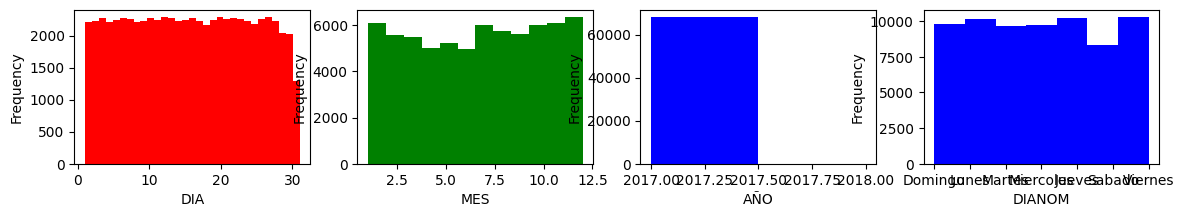

In [207]:
fig, ax = plt.subplots(1, 4, figsize=(14, 2))

ax[0].hist(df['DIA'], bins=31, color='red')
ax[0].set_xlabel('DIA')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['MES'], bins=12, color='green')
ax[1].set_xlabel('MES')
ax[1].set_ylabel('Frequency')

ax[2].hist(df['AÑO'], bins=2, color='blue')
ax[2].set_xlabel('AÑO')
ax[2].set_ylabel('Frequency')

ax[3].hist(df['DIANOM'], bins=7, color='blue')
ax[3].set_xlabel('DIANOM')
ax[3].set_ylabel('Frequency')

plt.show()

Conclusiones:
- A primera vista no se ve nada raro con estas variables. Los días, meses, años y dianom estan en un rango adecuado. No se ven los datos centrados en algun valor en particular.
- Los datos son mayormente del 2017, a excepcion de dos vuelos que pasaron justo de la media noche del ultimo dia del 2017. (por retrasos)

### Categoric variables distributions

In [208]:
def distribution_cat_variables(variable):
    # Group the data by airline and count the number of flights for each airline
    airline_counts = df[variable].value_counts()

    # Normalize the values to show proportions
    airline_proportions = airline_counts / airline_counts.sum()

    # Create a bar graph of airline market share
    plt.figure(figsize=(10, 2))
    airline_proportions.plot(kind='bar',cmap='viridis')
    plt.title(f'Number of flights by {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Proportion of Flights')
    plt.show()

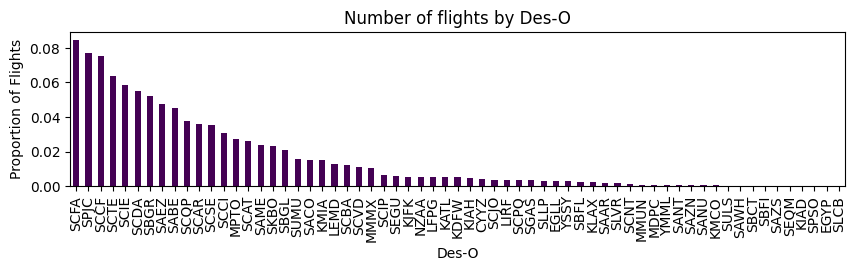

In [209]:
distribution_cat_variables('Des-O')

Conclusion:
- Existen destinos con muchos mas vuelos que otros.

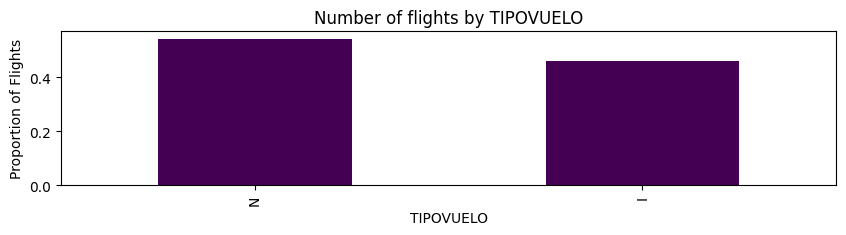

In [210]:
distribution_cat_variables('TIPOVUELO')

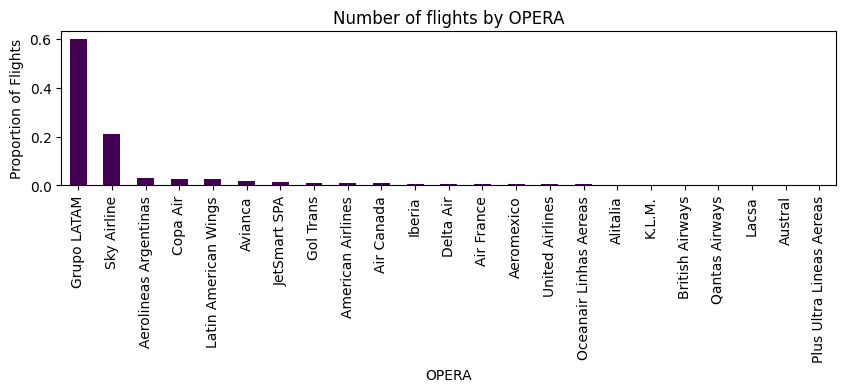

In [211]:
distribution_cat_variables('OPERA')

Concluiones:
- Latam y Sky tienen un 80% de los vuelos.

In [212]:
# Assuming your data is stored in a DataFrame called 'df'
# Count the number of flights for each combination of 'OPERA' and 'Des-O'
counts = df.groupby(['OPERA', 'Des-O']).size().reset_index(name='counts')

# Pivot the counts to create the matrix
matrix = counts.pivot(index='OPERA', columns='Des-O', values='counts')

### Time variables

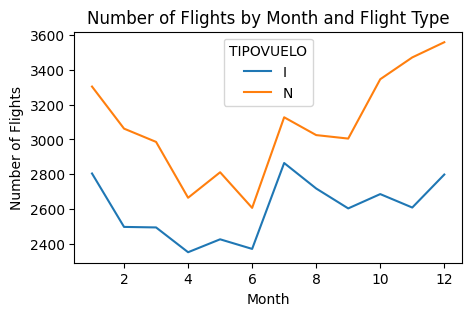

In [213]:
# Group the data by month and flight type and count the number of flights for each group
month_type_counts = df.groupby(['MES', 'TIPOVUELO']).size().unstack()

# Create a line chart of number of flights by month and flight type
ax = month_type_counts.plot(kind='line', figsize=(5, 3))
ax.set_title('Number of Flights by Month and Flight Type')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights')
plt.show()

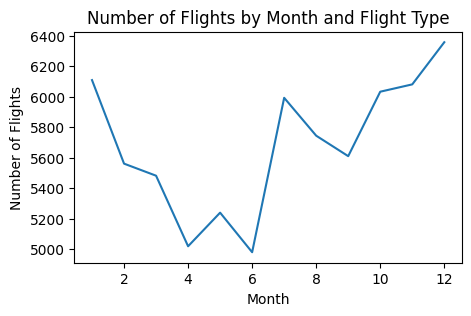

In [214]:
# Group the data by month and flight type and count the number of flights for each group
month_type_counts = df.groupby(['MES']).size()

# Create a line chart of number of flights by month and flight type
ax = month_type_counts.plot( figsize=(5, 3))
ax.set_title('Number of Flights by Month and Flight Type')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights')
plt.show()

Conclusiones:
- La estacionalidad de vuelos naciones e internacionales es la misma.

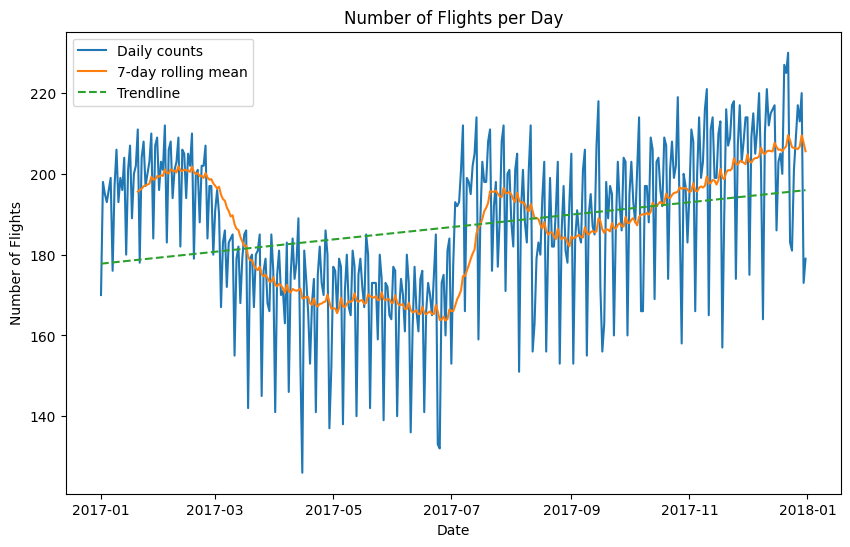

In [215]:
# Resample the data to daily frequency and calculate the rolling mean with a window size of 7 days
daily_counts = df.set_index('Fecha-I').resample('D').size()
rolling_mean = daily_counts.rolling(window=20).mean()

# Plot the daily flight counts and the rolling mean
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_counts.index, daily_counts.values, label='Daily counts')
ax.plot(rolling_mean.index, rolling_mean.values, label='7-day rolling mean')
ax.legend()

# Calculate and plot the trendline
x = np.arange(len(daily_counts))
coeffs = np.polyfit(x, daily_counts, 1)
trendline = np.poly1d(coeffs)
ax.plot(daily_counts.index, trendline(x), label='Trendline', linestyle='--')
ax.legend()

ax.set_title('Number of Flights per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights')
plt.show()

Conclusiones:
- Notamos que hay dos peak en la demanda de vuelos
- Un peak puede relacionarse con las vacaciones de invierno en Chile (finales de Julio - principios de Agosto)
- El otro peak puede relacionarse con las vacaciones de verano en Chile (finales de Noviembre - principios de Marzo)

# 2. Generate additional columns
Instructions: Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:
○ high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
○ min_diff : difference in minutes between Date-O and Date-I .
○ delay_15 : 1 if min_diff > 15, 0 if not.
○ period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I .

Se generan las siguientes columnas. Notemos que las siguientes columnas solo dependen de la información relativa a un vuelo, lo que es importante, ya que no generaran "Data leakage". Hay que tener eso en cuenta al generar variables que utilicen información historica.

## high_season
1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

In [216]:
df["high_season"] = (
      ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | 
      (df['Fecha-I'].dt.month == 1) | 
      (df['Fecha-I'].dt.month == 2) | 
      ((df['Fecha-I'].dt.month == 3) & (df['Fecha-I'].dt.day <= 3)) | 
      ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | 
      ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
   ).astype(int)

df["high_season_2"] = (
      ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | 
      (df['Fecha-I'].dt.month == 1) | 
      ((df['Fecha-I'].dt.month == 3) & (df['Fecha-I'].dt.day <= 3)) | 
      ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31))
      ).astype(int)

## min_diff
difference in minutes between Date-O and Date-I .

In [217]:
df['min_diff'] = df.apply(lambda x: (x['Fecha-O'] - x['Fecha-I']).total_seconds() / 60, axis=1)

## delay_15
1 if min_diff > 15, 0 if not.

In [218]:
df['delay_15'] = (df['min_diff'] > 15).astype(int)

Ya que tenemos esta variable, se estudia cuantos vuelos se retrasan dentro de la base de datos.

In [219]:
mask = df["delay_15"] == 1
len(df[mask])/len(df)

0.18493974137172683

un 20% de la base de datos se atrasa. Si bien la base de datos tiene una mayor cantidad de vuelos que no se atrasan, la cantidad de vuelos que si se atrasa es representativa. Aún así se podrian utilizar técnicas para balancer de mejor manera las clases.

## period_day
morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based on Date-I .

In [220]:
# Create the period_day variable
df.loc[(df['Fecha-I'].dt.hour >= 5) & (df['Fecha-I'].dt.hour < 12), 'period_day'] = 'morning'
df.loc[(df['Fecha-I'].dt.hour >= 12) & (df['Fecha-I'].dt.hour < 19), 'period_day'] = 'afternoon'
df.loc[((df['Fecha-I'].dt.hour >= 19) & (df['Fecha-I'].dt.hour <= 23)) | ((df['Fecha-I'].dt.hour >= 0) & (df['Fecha-I'].dt.hour < 5)), 'period_day'] = 'night'

## Guardar en .CSV

In [221]:
df[["high_season", "min_diff", "delay_15", "period_day"]].to_csv(os.path.join(data_path, "synthetic_features.csv"))

# 3. Behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight.
Question: . What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What
variables would you expect to have the most influence in predicting delays?

## Q : What variables would you expect to have the most influence in predicting delays?

### Delay rate across destination

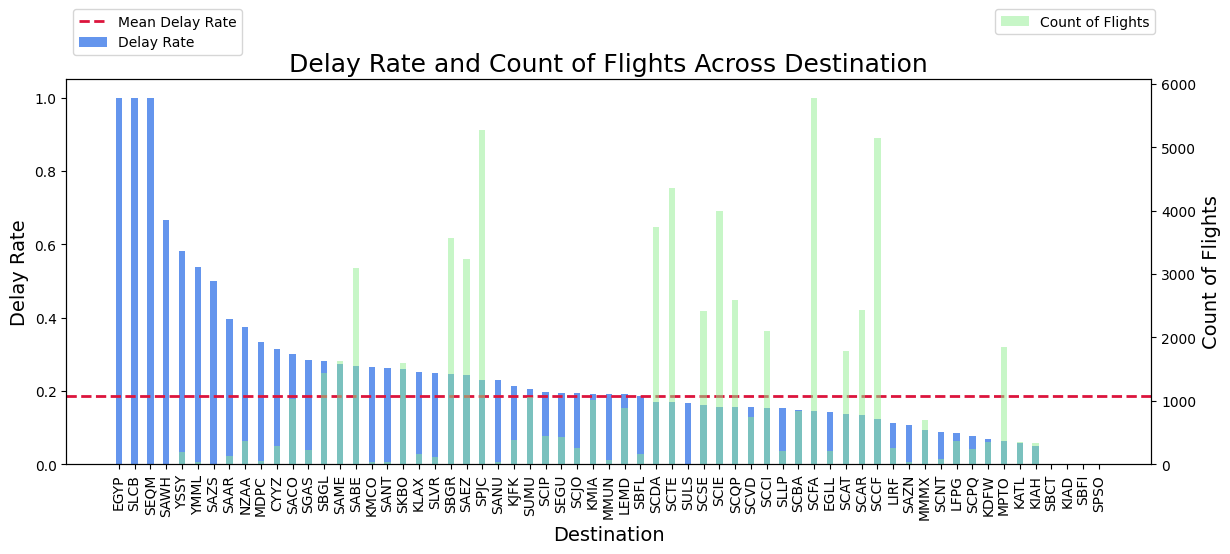

In [222]:
# Calculate delay rate and count of flights by destination
delay_rate = df.groupby('Des-O')['delay_15'].mean().sort_values(ascending=False)
flight_count = df['Des-O'].value_counts()

# Sort flight_count by delay_rate index
flight_count = flight_count.loc[delay_rate.index]

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(delay_rate.index, delay_rate.values, color='cornflowerblue', width=0.4, label='Delay Rate')

ax2 = ax.twinx()
ax2.bar(flight_count.index, flight_count.values, color='lightgreen', alpha=0.5, width=0.4, label='Count of Flights')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Destination', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax2.set_ylabel('Count of Flights', fontsize=14)
ax.set_title('Delay Rate and Count of Flights Across Destination', fontsize=18)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0, 1.2))
ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.85, 1.2))

# Add values on top of each bar
# for i, v in enumerate(delay_rate.values):
#     ax.text(i, v, f'{v:.2f}', fontsize=8)
# for i, v in enumerate(flight_count.values):
#     ax2.text(i, v, str(v), fontsize=8)

plt.show()

Conclusiones:
- Notamos que hay destinos con un delay rate mucho más alta que otros.
- Se ve que tambien hay destinos con delay rate 1 o 0, algunos con una baja cantidad de vuelos pero otros no.
- Tambien hay algunos destinos con una tasa sobre el promedio, pero que tienen una baja cantidad de vuelos.
- Los destinos con pocos vuelos no van a tener una estimacion correcta, hay que tener cuidado con eso.

### Delay rate across airline

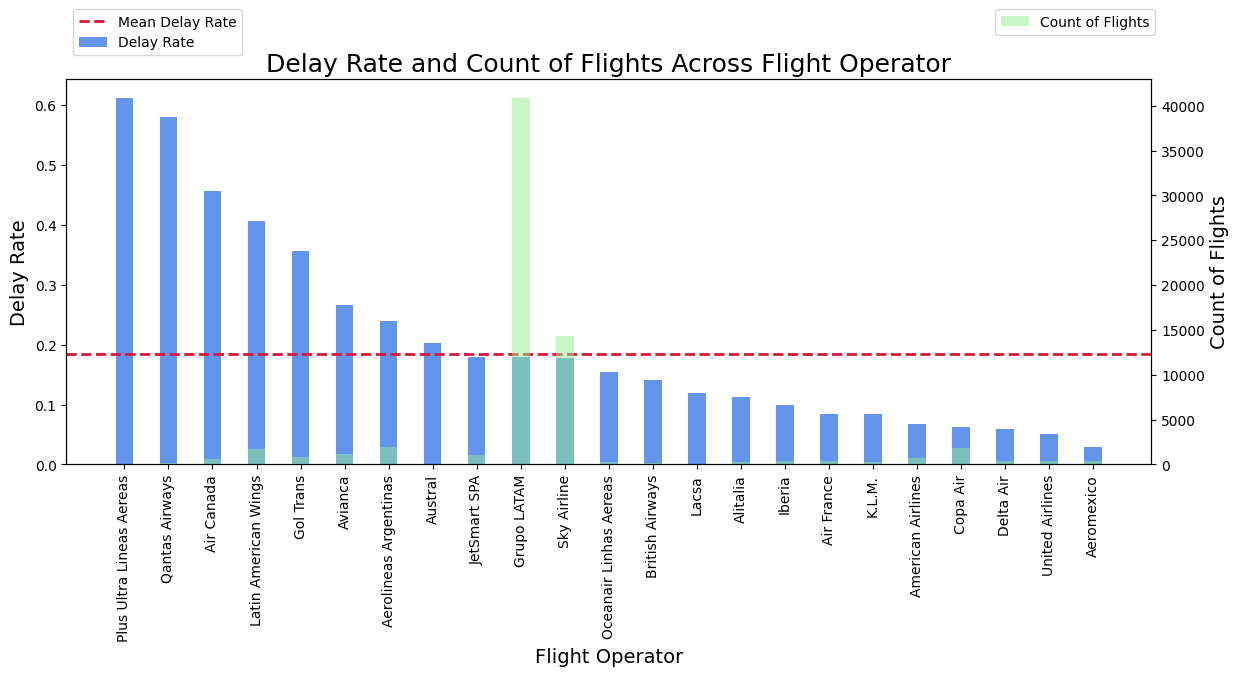

In [223]:
# Calculate delay rate and count of flights by Flight Operator
delay_rate = df.groupby('OPERA')['delay_15'].mean().sort_values(ascending=False)
flight_count = df['OPERA'].value_counts()

# Sort flight_count by delay_rate index
flight_count = flight_count.loc[delay_rate.index]

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(delay_rate.index, delay_rate.values, color='cornflowerblue', width=0.4, label='Delay Rate')

ax2 = ax.twinx()
ax2.bar(flight_count.index, flight_count.values, color='lightgreen', alpha=0.5, width=0.4, label='Count of Flights')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Flight Operator', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax2.set_ylabel('Count of Flights', fontsize=14)
ax.set_title('Delay Rate and Count of Flights Across Flight Operator', fontsize=18)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0, 1.2))
ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.85, 1.2))

# Add values on top of each bar
# for i, v in enumerate(delay_rate.values):
#     ax.text(i, v, f'{v:.2f}', fontsize=8)
# for i, v in enumerate(flight_count.values):
#     ax2.text(i, v, str(v), fontsize=8)

plt.show()

Conclusion:
- Hay diferentes diferentes tipos de delay rate por cada aerolinea
- LATAM y Ski Airline tienen cerca de un 80% de los vuelos.
- The performance of those airlines could have a significant impact on the overall delay rate
- We may want to consider giving more weight to the delay rate of those airlines 
- We have a small sample size for some airlines (21 out of 23). I'm concerned about the reliability of the delay rate estimates, then it might be better to not include delay rate per airline as a feature in the model.

### Delay rate across day of the week

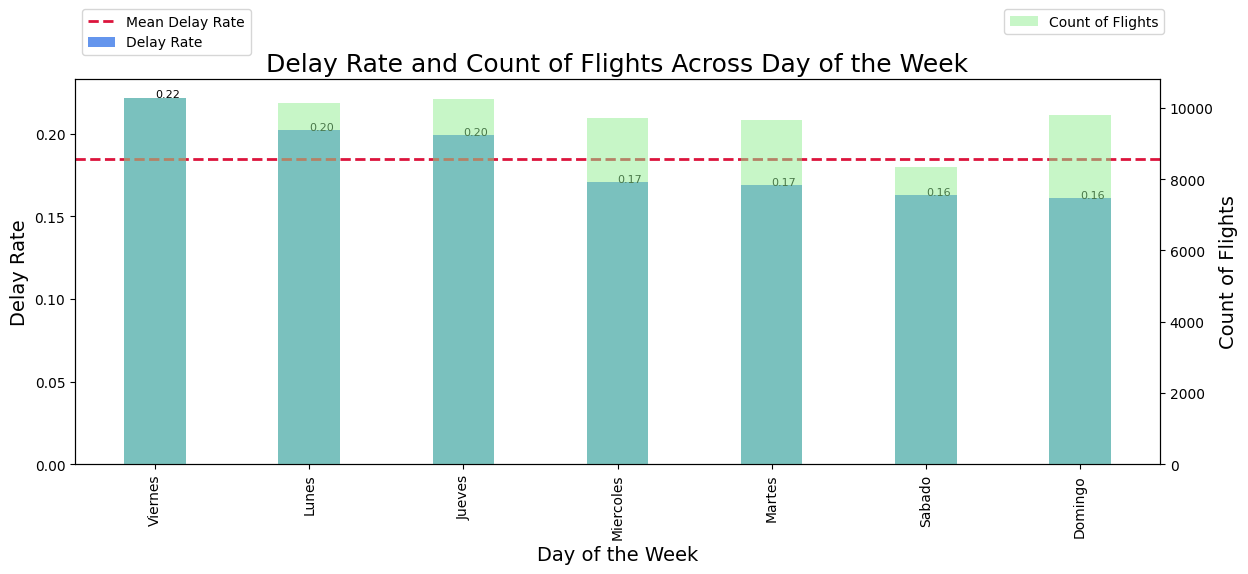

In [224]:
# Calculate delay rate and count of flights by Day of the Week
delay_rate = df.groupby('DIANOM')['delay_15'].mean().sort_values(ascending=False)
flight_count = df['DIANOM'].value_counts()

# Sort flight_count by delay_rate index
flight_count = flight_count.loc[delay_rate.index]

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(delay_rate.index, delay_rate.values, color='cornflowerblue', width=0.4, label='Delay Rate')

ax2 = ax.twinx()
ax2.bar(flight_count.index, flight_count.values, color='lightgreen', alpha=0.5, width=0.4, label='Count of Flights')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax2.set_ylabel('Count of Flights', fontsize=14)
ax.set_title('Delay Rate and Count of Flights Across Day of the Week', fontsize=18)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0, 1.2))
ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.85, 1.2))

# Add values on top of each bar
for i, v in enumerate(delay_rate.values):
    ax.text(i, v, f'{v:.2f}', fontsize=8)
# for i, v in enumerate(flight_count.values):
#     ax2.text(i, v, str(v), fontsize=8)

plt.show()

Conclusion:
- Hay una diferencia en el delay rate por dia de la semana.
- No parece haber una correlacion directa con la cantidad de vuelos.
- Es una buena variable para agregar al modelo como variable numerica.

Conclusiones:
- El viernes tiene una tasa mayor de retrasos. Tal vez sal

### Delay rate across month

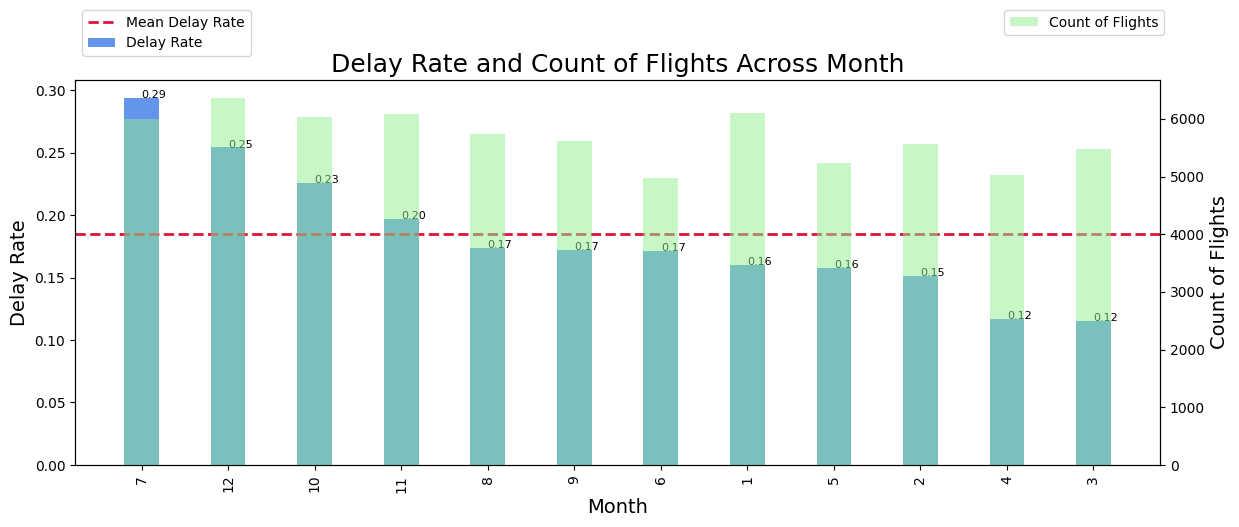

In [225]:
# Calculate delay rate and count of flights by Month
delay_rate = df.groupby('MES')['delay_15'].mean().sort_values(ascending=False)
flight_count = df['MES'].value_counts()

# Sort flight_count by delay_rate index
flight_count = flight_count.loc[delay_rate.index]

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 5))

ax.bar(delay_rate.index.astype(str), delay_rate.values, color='cornflowerblue', width=0.4, label='Delay Rate')

ax2 = ax.twinx()
ax2.bar(flight_count.index.astype(str), flight_count.values, color='lightgreen', alpha=0.5, width=0.4, label='Count of Flights')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax2.set_ylabel('Count of Flights', fontsize=14)
ax.set_title('Delay Rate and Count of Flights Across Month', fontsize=18)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0, 1.2))
ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.85, 1.2))

# Add values on top of each bar
for i, v in enumerate(delay_rate.values):
    ax.text(i, v, f'{v:.2f}', fontsize=8)
# for i, v in enumerate(flight_count.values):
#     ax2.text(i, v, str(v), fontsize=8)

plt.show()

Conclusion:
- Los meses con mayor cantidad de vuelos no son necesariamente los con mayor cantidad de retrasos. Por ejemplo, el mes 1 tiene una gran cantidad de vuelos, pero no presenta gran cantidad de retrasos (bajo la media).

### Delay rate across season

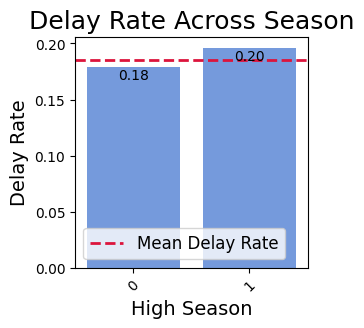

In [226]:
# Calculate delay rate by high_season
delay_rate_season = df.groupby('high_season')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=delay_rate_season.index, y=delay_rate_season.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('High Season', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Season', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)

plt.show()

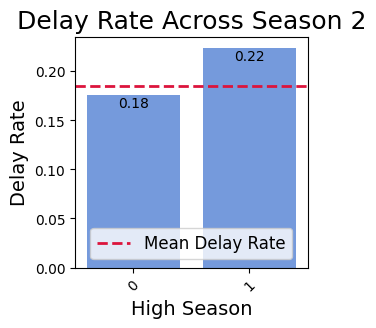

In [227]:
# Calculate delay rate by high_season
delay_rate_season = df.groupby('high_season_2')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=delay_rate_season.index, y=delay_rate_season.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('High Season', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Season 2', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12, loc='lower center')

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)

plt.show()

Conclusiones:
- Existe una diferencia entre seasons, aunque no mayor.
- Tal vez la HIGH SEASON se define en otros periodos, como se ve en los peak de los graficos de cantidad de vuelos por día.
- En base a eso se creo high season 2, que se prefiere agregar como variable, ya que genera una mayor segregacion.
- Se agrega como variable numerica.

### Delay rate across  type of flight

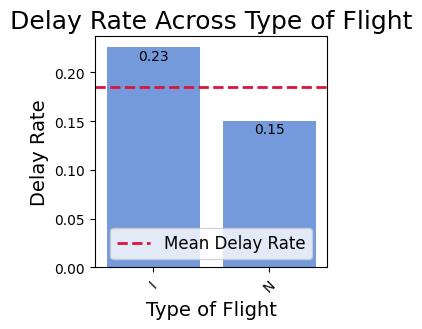

In [228]:
# Calculate delay rate by high_season
delay_rate_type_flight = df.groupby('TIPOVUELO')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=delay_rate_type_flight.index, y=delay_rate_type_flight.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Type of Flight', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Type of Flight', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12, loc='lower center')

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)


plt.show()

Conluciones:
- Es una variable que vale la pena agregar ya que es capaz de diferenciar.

## A: Type of flight, high season 2, and month will have the most impact. I'm not sure about how destination and fly operator will work.

# 4. Train Model
Instructions: Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables

In [229]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
# log_loss_score
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [230]:
df.sort_values(by='Fecha-I', ascending=True, inplace = True)

In [231]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O',
       'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES',
       'high_season', 'high_season_2', 'min_diff', 'delay_15', 'period_day'],
      dtype='object')

## Idea

El plan es utilizar un 80% de la base de datos para entrenar el modelo. Sobre este 80% se utilizara  rolling window approach to splitting the data into training and testing sets.

### Seleccion de columnas base

No se utiliza (aparte de las ya explicadas):
- año ya que hay un único año (2017)
- DIA. Se considera dia de semana y mes, pero no DIA del mes.
- High season.
- min_diff: correlacion con delay_15
- Fecha-I: se utilza para elegir las filas y tener orden del dataframe, pero no como una feature

In [232]:
df_pre_model = df.copy()

In [233]:
columns = ['Vlo-O', 'Des-O', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season_2', 'period_day', 'delay_15']
df = df_pre_model[columns]
df.head()

Vlo-O Des-O  MES   DIANOM TIPOVUELO        OPERA  high_season_2  \
169     11  MMMX    1  Domingo         I   Aeromexico              1   
5078   572  SKBO    1  Domingo         I  Grupo LATAM              1   
622    495  MPTO    1  Domingo         I     Copa Air              1   
409    240  SKBO    1  Domingo         I      Avianca              1   
592    276  MPTO    1  Domingo         I     Copa Air              1   

     period_day  delay_15  
169       night         0  
5078      night         0  
622       night         0  
409       night         0  
592       night         0

In [234]:
mask = df.duplicated()
df[mask]

Vlo-O Des-O  MES   DIANOM TIPOVUELO              OPERA  high_season_2  \
4972    502  KMIA    1   Jueves         I        Grupo LATAM              1   
1120   8160  SPJC    1  Domingo         I        Grupo LATAM              1   
176      11  MMMX    1  Domingo         I         Aeromexico              1   
5085    572  SKBO    1  Domingo         I        Grupo LATAM              1   
415     240  SKBO    1  Domingo         I            Avianca              1   
...     ...   ...  ...      ...       ...                ...            ...   
62755   846  KIAH   12  Domingo         I    United Airlines              1   
66947   622  MMMX    1    Lunes         I        Grupo LATAM              1   
62026    11  MMMX   12  Domingo         I         Aeromexico              1   
66918   602  KLAX    1    Lunes         I        Grupo LATAM              1   
61862   226  KMIA   12  Domingo         I  American Airlines              1   

      period_day  delay_15  
4972       night         1  
1120       night         1  
176        night         0  
5085       night         0  
415        night         0  
...          ...       ...  
62755      night         0  
66947      night         1  
62026      night         0  
66918      night         0  
61862      night         0  

[38381 rows x 9 columns]

In [235]:
columns = ['Vlo-O', 'Des-O', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season_2', 'period_day', 'delay_15']
columns_2 = columns[:-1]
df = df_pre_model[columns]

X = df[columns[:-1]]
y = df[columns[-1]]

# Split the data into training and validation sets with stratification
X_train_base, X_test_final, y_train_base, y_test_final = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to perform feature engineering on each fold of data
def feature_engineering(X_train, X_test, y_train, airline_threshold=0.01, route_threshold=0.01):
    # X_train.reset_index(drop=True, inplace=True)
    # X_test.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)
    
    X_train = pd.concat([X_train, y_train.rename('delay_15')], axis=1)
    X_test = pd.concat([X_test, y_train[0:len(X_test)].rename('delay_15')], axis=1)
    
    # Calculate mean delay for each airline with at least airline_threshold fraction of flights based on X_train
    airline_counts = X_train['OPERA'].value_counts(normalize=True)
    airlines_above_threshold = airline_counts.index[airline_counts >= airline_threshold]
    airline_means = X_train.loc[X_train['OPERA'].isin(airlines_above_threshold)].groupby('OPERA')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by airline
    X_train = X_train.merge(airline_means, on='OPERA', how='left', suffixes=['', '_mean_OPERA'])
    X_test = X_test.merge(airline_means, on='OPERA', how='left', suffixes=['', '_mean_OPERA'])

    # Calculate mean delay for each route with at least route_threshold fraction of flights based on X_train
    route_counts = X_train['Des-O'].value_counts(normalize=True)
    routes_above_threshold = route_counts.index[route_counts >= route_threshold]
    route_means = X_train.loc[X_train['Des-O'].isin(routes_above_threshold)].groupby('Des-O')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by route
    X_train = X_train.merge(route_means, on='Des-O', how='left', suffixes=['', '_mean_Des-O'])
    X_test = X_test.merge(route_means, on='Des-O', how='left', suffixes=['', '_mean_Des-O'])

    # Calculate mean delay for each day of the week based on X_train
    day_means = X_train.groupby('DIANOM')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by day of the week
    X_train = X_train.merge(day_means, on='DIANOM', how='left', suffixes=['', '_mean_DIANOM'])
    X_test = X_test.merge(day_means, on='DIANOM', how='left', suffixes=['', '_mean_DIANOM'])

    # Calculate mean delay for each month based on X_train
    month_means = X_train.groupby('MES')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by month
    X_train = X_train.merge(month_means, on='MES', how='left', suffixes=['', '_mean_MES'])
    X_test = X_test.merge(month_means, on='MES', how='left', suffixes=['', '_mean_MES'])

    # Calculate mean delay for each high season indicator based on X_train
    season_means = X_train.groupby('high_season_2')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by high season indicator
    X_train = X_train.merge(season_means, on='high_season_2', how='left', suffixes=['', '_mean_high_season_2'])
    X_test = X_test.merge(season_means, on='high_season_2', how='left', suffixes=['', '_mean_high_season_2'])

    # Calculate mean delay for each flight type based on X_train
    flight_means = X_train.groupby('TIPOVUELO')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by flight type
    X_train = X_train.merge(flight_means, on='TIPOVUELO', how='left', suffixes=['', '_mean_TIPOVUELO'])
    X_test = X_test.merge(flight_means, on='TIPOVUELO', how='left', suffixes=['', '_mean_TIPOVUELO'])

    # Calculate mean delay for each period of the day based on X_train
    period_means = X_train.groupby('period_day')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by period of the day
    X_train = X_train.merge(period_means, on='period_day', how='left', suffixes=['', '_mean_period_day'])
    X_test = X_test.merge(period_means, on='period_day', how='left', suffixes=['', '_mean_period_day'])
    
    # Create a OneHotEncoder object to transform categorical variables
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Select categorical variables to transform
    categorical_vars = columns_2

    # Fit the OneHotEncoder on the categorical variables in the training set
    ohe.fit(X_train[categorical_vars])

    # Transform the categorical variables in both the training and test sets
    X_train_ohe = pd.DataFrame(ohe.transform(X_train[categorical_vars]))
    X_test_ohe = pd.DataFrame(ohe.transform(X_test[categorical_vars]))

    # Rename the columns of the OneHotEncoder output to match the original variable names
    X_train_ohe.columns = ohe.get_feature_names_out(categorical_vars)
    X_test_ohe.columns = ohe.get_feature_names_out(categorical_vars)
    
    # Set the new columns as categorical
    for col in X_train_ohe.columns:
        X_train_ohe[col] = X_train_ohe[col].astype('category')
        X_test_ohe[col] = X_test_ohe[col].astype('category')

    # Add the transformed categorical variables back into the training and test sets
    X_train = pd.concat([X_train, X_train_ohe], axis=1)
    X_test = pd.concat([X_test, X_test_ohe], axis=1)

    # Drop the original categorical variables from the training and test sets
    X_train.drop(categorical_vars, axis=1, inplace=True)
    X_test.drop(categorical_vars, axis=1, inplace=True)
    
    X_test.drop(["delay_15"], axis=1, inplace=True)
    X_train.drop(["delay_15"], axis=1, inplace=True)
    return X_train, X_test

# Loop over each fold and train/evaluate the model with feature engineering
for train_index, test_index in kf.split(X_train_base, y_train_base):
    # Split the data into train and test sets
    
    X_train, X_test = X_train_base.iloc[train_index], X_train_base.iloc[test_index]
    y_train, y_test = y_train_base.iloc[train_index], y_train_base.iloc[test_index]
    
    X_train.reset_index(inplace=True, drop =True)
    X_test.reset_index(inplace=True, drop =True)
    y_train.reset_index(inplace=True, drop =True)
    y_test.reset_index(inplace=True, drop =True)

  
    # Perform feature engineering on the data
    X_train, X_test = feature_engineering(X_train, X_test, y_train)

    # Train the XGBoost model
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, missing=np.nan, enable_categorical=True)
    params = {
        'objective': 'reg:logistic',
        'eval_metric': 'logloss',
        'max_depth': 10,
        'eta': 0.1,
        'subsample': 0.6,
        'colsample_bytree': 0.6,
        'verbosity': 0,
        'scale_pos_weight': 4
    }
    num_rounds = 1000
    xgb_model = xgb.train(params, dtrain, num_rounds)
    
    # Evaluate the XGBoost model
    y_pred = xgb_model.predict(dtest)
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"AUC score: {auc_score}")

c:\Users\diria\Desktop\PRoyectos\desafio_latam\.desafio_latam_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


AUC score: 0.6750204654291166


c:\Users\diria\Desktop\PRoyectos\desafio_latam\.desafio_latam_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


AUC score: 0.6904271141812615


c:\Users\diria\Desktop\PRoyectos\desafio_latam\.desafio_latam_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
columns = ['Vlo-O', 'Des-O', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season_2', 'period_day', 'delay_15']
columns_2 = columns[:-1]
df = df_pre_model[columns]

X = df[columns[:-1]]
y = df[columns[-1]]

# Split the data into training and validation sets with stratification
X_train_base, X_test_final, y_train_base, y_test_final = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to perform feature engineering on each fold of data
def feature_engineering(X_train, X_test, y_train, airline_threshold=0.01, route_threshold=0.01):
    # X_train.reset_index(drop=True, inplace=True)
    # X_test.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)
    
    X_train = pd.concat([X_train, y_train.rename('delay_15')], axis=1)
    X_test = pd.concat([X_test, y_train[0:len(X_test)].rename('delay_15')], axis=1)
    
    # Calculate mean delay for each airline with at least airline_threshold fraction of flights based on X_train
    airline_counts = X_train['OPERA'].value_counts(normalize=True)
    airlines_above_threshold = airline_counts.index[airline_counts >= airline_threshold]
    airline_means = X_train.loc[X_train['OPERA'].isin(airlines_above_threshold)].groupby('OPERA')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by airline
    X_train = X_train.merge(airline_means, on='OPERA', how='left', suffixes=['', '_mean_OPERA'])
    X_test = X_test.merge(airline_means, on='OPERA', how='left', suffixes=['', '_mean_OPERA'])

    # Calculate mean delay for each route with at least route_threshold fraction of flights based on X_train
    route_counts = X_train['Des-O'].value_counts(normalize=True)
    routes_above_threshold = route_counts.index[route_counts >= route_threshold]
    route_means = X_train.loc[X_train['Des-O'].isin(routes_above_threshold)].groupby('Des-O')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by route
    X_train = X_train.merge(route_means, on='Des-O', how='left', suffixes=['', '_mean_Des-O'])
    X_test = X_test.merge(route_means, on='Des-O', how='left', suffixes=['', '_mean_Des-O'])

    # Calculate mean delay for each day of the week based on X_train
    day_means = X_train.groupby('DIANOM')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by day of the week
    X_train = X_train.merge(day_means, on='DIANOM', how='left', suffixes=['', '_mean_DIANOM'])
    X_test = X_test.merge(day_means, on='DIANOM', how='left', suffixes=['', '_mean_DIANOM'])

    # Calculate mean delay for each month based on X_train
    month_means = X_train.groupby('MES')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by month
    X_train = X_train.merge(month_means, on='MES', how='left', suffixes=['', '_mean_MES'])
    X_test = X_test.merge(month_means, on='MES', how='left', suffixes=['', '_mean_MES'])

    # Calculate mean delay for each high season indicator based on X_train
    season_means = X_train.groupby('high_season_2')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by high season indicator
    X_train = X_train.merge(season_means, on='high_season_2', how='left', suffixes=['', '_mean_high_season_2'])
    X_test = X_test.merge(season_means, on='high_season_2', how='left', suffixes=['', '_mean_high_season_2'])

    # Calculate mean delay for each flight type based on X_train
    flight_means = X_train.groupby('TIPOVUELO')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by flight type
    X_train = X_train.merge(flight_means, on='TIPOVUELO', how='left', suffixes=['', '_mean_TIPOVUELO'])
    X_test = X_test.merge(flight_means, on='TIPOVUELO', how='left', suffixes=['', '_mean_TIPOVUELO'])
    
    # Calculate mean delay for each flight type based on X_train
    vlo_means = X_train.groupby('Vlo-o')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by flight type
    X_train = X_train.merge(flight_means, on='Vlo-o', how='left', suffixes=['', '_mean_Vlo-o'])
    X_test = X_test.merge(flight_means, on='Vlo-o', how='left', suffixes=['', '_mean_Vlo-o'])

    # Calculate mean delay for each period of the day based on X_train
    period_means = X_train.groupby('period_day')['delay_15'].mean()

    # Create a new feature in X_train and X_test for mean delay by period of the day
    X_train = X_train.merge(period_means, on='period_day', how='left', suffixes=['', '_mean_period_day'])
    X_test = X_test.merge(period_means, on='period_day', how='left', suffixes=['', '_mean_period_day'])
    
    # Create a OneHotEncoder object to transform categorical variables
    # ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # # Select categorical variables to transform
    # categorical_vars = columns_2

    # # Fit the OneHotEncoder on the categorical variables in the training set
    # ohe.fit(X_train[categorical_vars])

    # # Transform the categorical variables in both the training and test sets
    # X_train_ohe = pd.DataFrame(ohe.transform(X_train[categorical_vars]))
    # X_test_ohe = pd.DataFrame(ohe.transform(X_test[categorical_vars]))

    # # Rename the columns of the OneHotEncoder output to match the original variable names
    # X_train_ohe.columns = ohe.get_feature_names_out(categorical_vars)
    # X_test_ohe.columns = ohe.get_feature_names_out(categorical_vars)
    
    # # Set the new columns as categorical
    # for col in X_train_ohe.columns:
    #     X_train_ohe[col] = X_train_ohe[col].astype('category')
    #     X_test_ohe[col] = X_test_ohe[col].astype('category')

    # # Add the transformed categorical variables back into the training and test sets
    # X_train = pd.concat([X_train, X_train_ohe], axis=1)
    # X_test = pd.concat([X_test, X_test_ohe], axis=1)

    # # Drop the original categorical variables from the training and test sets
    # X_train.drop(categorical_vars, axis=1, inplace=True)
    # X_test.drop(categorical_vars, axis=1, inplace=True)
    
    X_test.drop(["delay_15", 'Vlo-O', 'Des-O', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season_2', 'period_day'], axis=1, inplace=True)
    X_train.drop(["delay_15", 'Vlo-O', 'Des-O', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season_2', 'period_day'], axis=1, inplace=True)
    return X_train, X_test

# Loop over each fold and train/evaluate the model with feature engineering
for train_index, test_index in kf.split(X_train_base, y_train_base):
    # Split the data into train and test sets
    
    X_train, X_test = X_train_base.iloc[train_index], X_train_base.iloc[test_index]
    y_train, y_test = y_train_base.iloc[train_index], y_train_base.iloc[test_index]
    
    X_train.reset_index(inplace=True, drop =True)
    X_test.reset_index(inplace=True, drop =True)
    y_train.reset_index(inplace=True, drop =True)
    y_test.reset_index(inplace=True, drop =True)

  
    # Perform feature engineering on the data
    X_train, X_test = feature_engineering(X_train, X_test, y_train)

    # Train the XGBoost model
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, missing=np.nan, enable_categorical=True)
    params = {
        'objective': 'reg:logistic',
        'eval_metric': 'logloss',
        'max_depth': 10,
        'eta': 0.1,
        'subsample': 0.6,
        'colsample_bytree': 0.6,
        'verbosity': 0,
        'scale_pos_weight': 4
    }
    num_rounds = 1000
    xgb_model = xgb.train(params, dtrain, num_rounds)
    
    # Evaluate the XGBoost model
    y_pred = xgb_model.predict(dtest)
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"AUC score: {auc_score}")